# 602 Team Project- Part 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jliu3627/Heart_Disease_Project/refs/heads/main/cleaned_heart_2022.csv')
df.head()

,Unnamed: 0,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,343,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,345,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,347,Alabama,Female,Good,3.0,10.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246013 entries, 0 to 246012
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 246013 non-null  int64  
 1   State                      246013 non-null  object 
 2   Sex                        246013 non-null  object 
 3   GeneralHealth              246013 non-null  object 
 4   PhysicalHealthDays         246013 non-null  float64
 5   MentalHealthDays           246013 non-null  float64
 6   LastCheckupTime            246013 non-null  object 
 7   PhysicalActivities         246013 non-null  object 
 8   SleepHours                 246013 non-null  float64
 9   RemovedTeeth               246013 non-null  object 
 10  HadHeartAttack             246013 non-null  object 
 11  HadAngina                  246013 non-null  object 
 12  HadStroke                  246013 non-null  object 
 13  HadAsthma                  24

### Values for Each Feature

In [ ]:
# for col_name in df.columns:
#     print(col_name)
#     print(np.unique(df[col_name][~pd.isna(df[col_name])]))
#     print()


# Response Variable

The response variable HadHeartDisease will combine the HadHeartAttack and HadAngina features where "Yes" indicates the patient had heart disease and "No" indicates the patient did not have heart disease. If either column had "Yes", then HadHeartDisease will also be "Yes", otherwise HadHeartDisease will be "No".

In [ ]:
df['HadHeartDisease'] = df.apply(lambda x: 'Yes' if x['HadHeartAttack'] == 'Yes' or x['HadAngina'] == 'Yes' else 'No', axis=1)

Number and percentage of Yes in dataset

In [ ]:
np.sum(df['HadHeartDisease'] == 'Yes'), np.mean(df['HadHeartDisease'] == 'Yes')

(21616, 0.08786527541227496)

# Feature Variables

Columns of Interest

In [ ]:
cols = [
    'Sex',
    'GeneralHealth',
    'PhysicalHealthDays',
    'MentalHealthDays',
    'LastCheckupTime',
    'SleepHours',
    'HadStroke',
    'SmokerStatus',
    'ECigaretteUsage',
    'RaceEthnicityCategory',
    'AgeCategory',
    'HeightInMeters',
    'WeightInKilograms',
    'BMI',
    'HighRiskLastYear',
]

In [ ]:
heart_df = df[cols]
heart_df = pd.get_dummies(heart_df, drop_first=True)
heart_df

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex_Male,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,...,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,HighRiskLastYear_Yes
0,4.0,0.0,9.0,1.60,71.67,27.99,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.0,0.0,6.0,1.78,95.25,30.13,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0.0,0.0,8.0,1.85,108.86,31.66,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,5.0,0.0,9.0,1.70,90.72,31.32,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,3.0,10.0,5.0,1.55,79.38,33.07,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246008,0.0,0.0,6.0,1.78,102.06,32.28,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
246009,0.0,7.0,7.0,1.93,90.72,24.34,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
246010,0.0,10.0,7.0,1.68,83.91,29.86,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False
246011,2.0,2.0,7.0,1.70,83.01,28.66,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
heart_df.head()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex_Male,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,...,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,HighRiskLastYear_Yes
0,4.0,0.0,9.0,1.60,71.67,27.99,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.0,0.0,6.0,1.78,95.25,30.13,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0.0,0.0,8.0,1.85,108.86,31.66,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,5.0,0.0,9.0,1.70,90.72,31.32,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,3.0,10.0,5.0,1.55,79.38,33.07,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246013 entries, 0 to 246012
Data columns (total 38 columns):
 #   Column                                                                   Non-Null Count   Dtype  
---  ------                                                                   --------------   -----  
 0   PhysicalHealthDays                                                       246013 non-null  float64
 1   MentalHealthDays                                                         246013 non-null  float64
 2   SleepHours                                                               246013 non-null  float64
 3   HeightInMeters                                                           246013 non-null  float64
 4   WeightInKilograms                                                        246013 non-null  float64
 5   BMI                                                                      246013 non-null  float64
 6   Sex_Male                                                    

# Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X = heart_df
y = df['HadHeartDisease'].values

In [ ]:
X.shape, y.shape

((246013, 38), (246013,))

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve

In [ ]:
# rf = RandomForestClassifier(n_estimators=20, criterion='entropy', max_depth=30, max_leaf_nodes=2, max_features='sqrt', class_weight='balanced')
rf = RandomForestClassifier(criterion='entropy', max_features='sqrt', class_weight='balanced')

In [ ]:
train_accuracies = []
test_accuracies = []

# Train the model for different numbers of trees and record accuracies
for n_estimators in range(1, 20):
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)

    # Predict on the training set
    train_pred = rf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)

    # Predict on the testing set
    test_pred = rf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

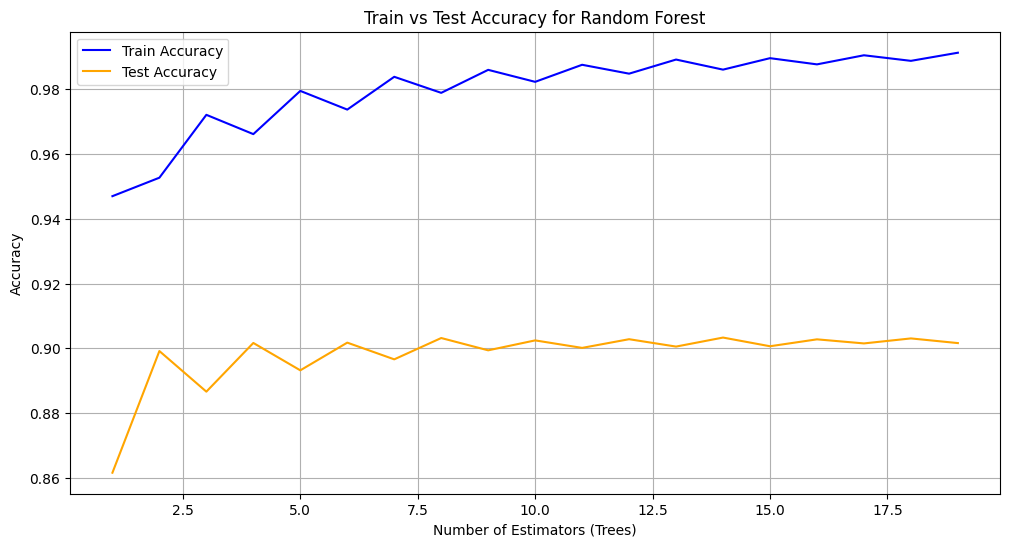

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, 20), test_accuracies, label='Test Accuracy', color='orange')
plt.title('Train vs Test Accuracy for Random Forest')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
ypred_rf = rf.predict(X_test)
print("RandomForest\n", classification_report(y_test, ypred_rf))

RandomForest
               precision    recall  f1-score   support

          No       0.92      0.98      0.95     44907
         Yes       0.31      0.10      0.16      4296

    accuracy                           0.90     49203
   macro avg       0.62      0.54      0.55     49203
weighted avg       0.87      0.90      0.88     49203



In [ ]:
# Compute ROC-AUC for Random Forest
yproba_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, yproba_rf, pos_label='Yes')
roc_auc_rf = auc(fpr_rf, tpr_rf)
print(f"ROC-AUC for Random Forest: {roc_auc_rf:.2f}")

ROC-AUC for Random Forest: 0.75


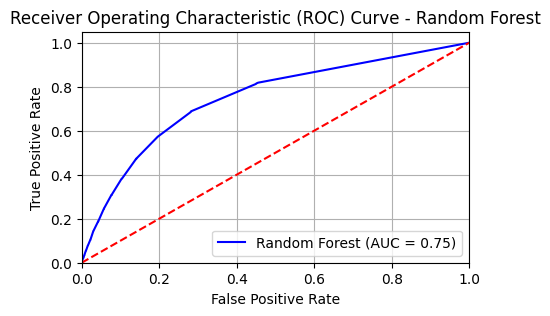

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

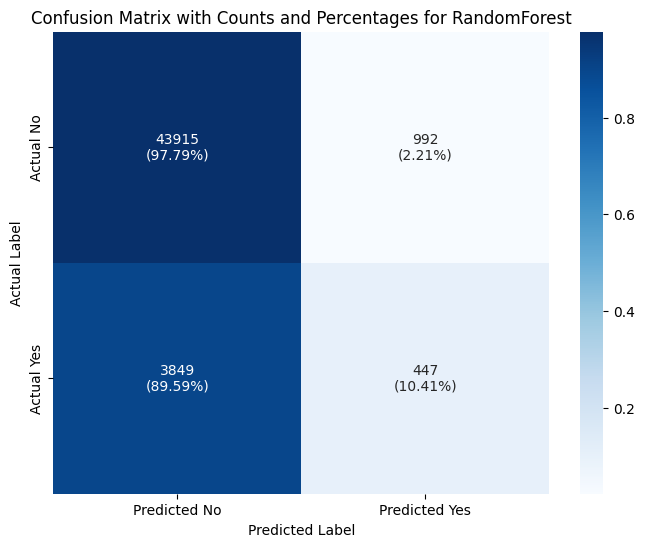

In [ ]:
cm = confusion_matrix(y_test, ypred_rf)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=np.array([[f"{count}\n({percentage:.2%})" for count, percentage in zip(row, normalized_row)] for row, normalized_row in zip(cm, cm_normalized)]),
            fmt='', cmap='Blues', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix with Counts and Percentages for RandomForest")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
log_reg = LogisticRegression(random_state=42, class_weight='balanced')

In [ ]:
param_grid = {
    'solver': ['liblinear'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'max_iter': [100, 500]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=0
)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500], 'penalty': ['l2'],
                         'solver': ['liblinear']})

In [ ]:
print(grid_search.best_params_)
best_log_reg = grid_search.best_estimator_

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Logistic Regression training accuracy
train_accuracy_log_reg = best_log_reg.score(X_train, y_train)
print(f"Logistic Regression Train Accuracy: {train_accuracy_log_reg:.2f}")

# Logistic Regression testing accuracy
test_accuracy_log_reg = best_log_reg.score(X_test, y_test)
print(f"Logistic Regression Test Accuracy: {test_accuracy_log_reg:.2f}")

Logistic Regression Train Accuracy: 0.74
Logistic Regression Test Accuracy: 0.74


In [ ]:
ypred_log_reg = best_log_reg.predict(X_test)
print("LogisticRegression\n", classification_report(y_test, ypred_log_reg))

LogisticRegression
               precision    recall  f1-score   support

          No       0.97      0.73      0.83     44907
         Yes       0.22      0.77      0.34      4296

    accuracy                           0.74     49203
   macro avg       0.59      0.75      0.59     49203
weighted avg       0.91      0.74      0.79     49203



In [ ]:
# Compute ROC-AUC for Logistic Regression
yproba_log_reg = best_log_reg.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, yproba_log_reg, pos_label='Yes')
roc_auc_log = auc(fpr_log, tpr_log)
print(f"ROC-AUC for Logistic Regression: {roc_auc_log:.2f}")

ROC-AUC for Logistic Regression: 0.83


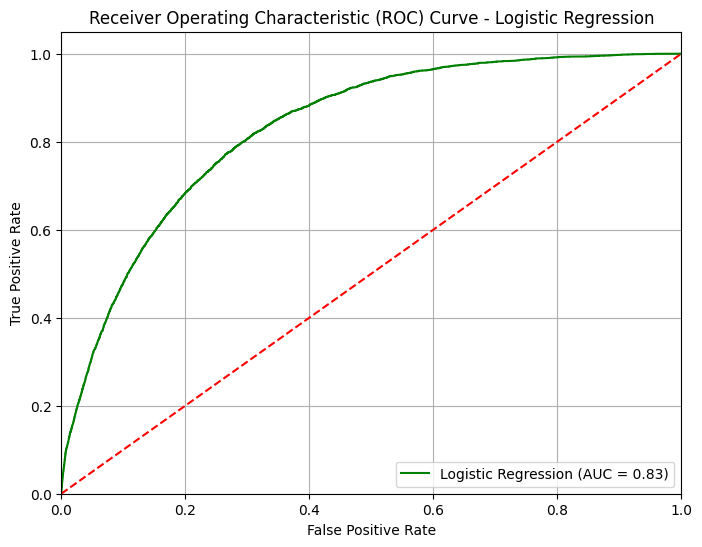

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='green', label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line representing a random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

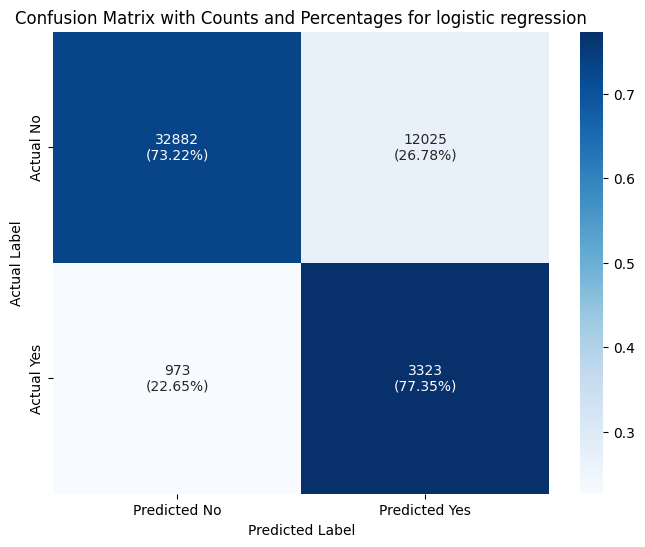

In [ ]:
cm = confusion_matrix(y_test, ypred_log_reg)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=np.array([[f"{count}\n({percentage:.2%})" for count, percentage in zip(row, normalized_row)] for row, normalized_row in zip(cm, cm_normalized)]),
            fmt='', cmap='Blues', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix with Counts and Percentages for logistic regression")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Discuss the accuracy of your methods, both on testing and training data. Is any method clearly superior? What does this say about the linear nature of your data?

### The accuracy of the two methods:  
#### **Random Forest Classification**  
Training Accuracy: From the accuracy plot, the random forest model achieves a very high training accuracy of over 98% as the number of trees increases, while the testing accuracy is between 86% and 90%, which stays lower than the training accuracy. This difference indicates some degree of overfitting since the model performs better on the training data than on unseen test data.  
<br>
Classification Report: The classification report shows that the model has a high precision (0.92), recall (0.98), and F1-score for the "No" class (No Heart Disease), while the "Yes" class (Heart Disease) has a lower precision (0.32), recall (0.11), and F1-score (0.16), indicating that the model struggles to correctly identify heart disease cases.  
<br>
ROC-AUC: The ROC-AUC score for random forest is 0.75, which shows moderate performance in distinguishing between the two classes.  
<br>
Confusion Matrix: From the confusion matrix, it’s clear that the model classifies most "No Heart Disease" cases correctly but fails to correctly classify a significant portion of "Heart Disease" cases, misclassifying about 89% of the "Heart Disease" cases.  
<br>
<br>

#### **Logistic Regression**
Training and Testing Accuracy: Both the training accuracy and testing accuracy are 74%, which shows that logistic regression performs similarly on both datasets and does not overfit. However, this lower accuracy indicates that the linear model is unable to capture more complex patterns in the data.  
<br>
Classification Report: The classification report shows that the class "No Heart Diesease" has a high precision (0.97), but the recall (0.73), indicating that some case of "no heart disease" are misclassified as "heart disease", while the class "Heart Disease" has a 0.77 recall (much better than random forest) but lower precision (0.22), indicating that the model detects more heart disease cases but also misclassifies many cases.  
<br>
ROC-AUC: The ROC-AUC score for logistic regression is 0.83 which is higher than random forest, indicating that logistic regression performs better in distinguishing between the two classes.  
<br>
Confusion Matrix: Logistic regression correctly classifies 77.35% of "Yes" (Heart Disease) cases, which is far better than random forest. However, it misclassifies 26.78% of "No" cases, resulting in false positives.

## Is any method clearly superior?

Random Forest has a higher overall accuracy (up to 90% on the test set), showing that it captures more complex, non-linear relationships in the data. However, it performs poorly in identifying the minority class, heart disease, with a recall of only 0.11 and a ROC-AUC of 0.75. This suggests that the model is heavily biased towards the majority class. On the other hand, logistic regression has a lower accuracy (74%) on both training and testing dataset, but it has a significantly higher ROC-AUC of 0.83, indicating that it is better at distinguishing between the two classes. It is clearly superior in identifying heart disease cases, with a recall of 0.77, which is much higher than random forest.  
Thus, Random Forest is clearly superior in demonstrating higher overall accuracy, indicating its ability to capture more complex, non-linear patterns in the data, and Logistic Regression is superior in distinguishing between the two classes.

## What does this say about the linear nature of your data?

Logistic Regression is a linear model, and its balanced accuracy (74%) on both training and test datasets suggests that the relationship between the features and the target variable has some linear characteristics, but it's not entirely linear. The ROC-AUC score of 0.83 confirms that logistic regression captures siginificant relationships in the data, especially for identifying heart disease. On the other hand, Random Forest, which is a non-linear model, shows higher accuracy overall (90%), suggesting that the data has important non-linear patterns that this model captures better than logistic regression. However, random forest's poor performance on the minority class shows that it's not handling the imbalance in the data as well as logistic regression.  
Thus, logistic regression handles well the linear relationships better, and random forest captures more of the non-linear aspects.